## Mynd Data Challenge

In this project, there are three phases:

1. Data cleaning
2. EDA
3. Modeling

### 1. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv(r"C:\Users\arash\Downloads\demographics.xlsx - demographics.csv")
df1.head()

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State
0,p3do03ecr7t67spn,Jayzua-nae,NaN,Yes,2011-04-20,East,NC
1,sfkib3fm5afbg4lv,Maxim,NaN,No,2009-01-20,Bay Area,CA
2,6i9ov0mud63gm7nq,Damyel,NaN,No,2020-10-09,East,NC
3,t1hal73tnuhhk6qa,Ellie,NaN,Yes,2004-01-31,East,NC
4,nne9gmjh9mnvagsc,Abigail,NaN,No,2007-09-11,Washington,WA


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863 entries, 0 to 4862
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4863 non-null   object 
 1   First Name      4861 non-null   object 
 2   Monthly Income  141 non-null    float64
 3   Pets            4863 non-null   object 
 4   Date of Birth   4863 non-null   object 
 5   Market          4863 non-null   object 
 6   State           4863 non-null   object 
dtypes: float64(1), object(6)
memory usage: 266.1+ KB


In [4]:
df1.isnull().sum()/len(df1)

ID                0.000000
First Name        0.000411
Monthly Income    0.971006
Pets              0.000000
Date of Birth     0.000000
Market            0.000000
State             0.000000
dtype: float64

There are two missing data in First Name columns and also 97% of Monthly income is missing, I will drop the two missing Fisrt name row and will drop the whole Income in the modeling process.

In [5]:
df1 = df1.dropna(subset=['First Name'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4861 entries, 0 to 4862
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4861 non-null   object 
 1   First Name      4861 non-null   object 
 2   Monthly Income  141 non-null    float64
 3   Pets            4861 non-null   object 
 4   Date of Birth   4861 non-null   object 
 5   Market          4861 non-null   object 
 6   State           4861 non-null   object 
dtypes: float64(1), object(6)
memory usage: 303.8+ KB


In [6]:
df1.Market.value_counts()

Southwest     1201
East          1125
Central        690
Washington     611
Bay Area       486
SoCal          407
Sacramento     341
Name: Market, dtype: int64

In [7]:
df1.State.value_counts()

CA    1234
AZ     695
TX     690
WA     577
NC     467
NV     461
GA     429
AL      78
FL      61
MS      46
CO      45
TN      44
OR      34
Name: State, dtype: int64

In [8]:
df1.Pets.value_counts()

No     3688
Yes    1173
Name: Pets, dtype: int64

The MArket and state match each other. The pet column is fine as well.

In [9]:
df1.ID.value_counts()

hil50gpk08pak286    12
mk6t4l5da8m1dss2     9
669fasfgrrd204ru     8
j83uq0j3aud30l74     8
773s7rqk9u1dmjeq     8
                    ..
j3kt9dg9pgius9sm     1
dlqotk7oo1b4npmr     1
ulrruc5cccrv7ul9     1
rv25e2mv5pav64u7     1
prt0ag9hb7dgtu       1
Name: ID, Length: 2525, dtype: int64

In [10]:
df1[df1.ID == 'hil50gpk08pak286']

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State
333,hil50gpk08pak286,Elizabeth,1500.0,No,2016-10-13,Bay Area,CA
605,hil50gpk08pak286,Abigail,1500.0,No,2016-08-23,Bay Area,CA
613,hil50gpk08pak286,Elizabeth,1.0,No,2016-10-13,Bay Area,CA
731,hil50gpk08pak286,Christian,2400.0,No,2012-11-12,Bay Area,CA
767,hil50gpk08pak286,Abigail,2600.0,No,2016-08-23,Bay Area,CA
1566,hil50gpk08pak286,Elizabeth,2400.0,No,2016-10-13,Bay Area,CA
1571,hil50gpk08pak286,Christian,1.0,No,2012-11-12,Bay Area,CA
1670,hil50gpk08pak286,Abigail,2400.0,No,2016-08-23,Bay Area,CA
2915,hil50gpk08pak286,Christian,1500.0,No,2012-11-12,Bay Area,CA
3699,hil50gpk08pak286,Christian,2600.0,No,2012-11-12,Bay Area,CA


In [11]:
df1[df1.ID == '669fasfgrrd204ru']

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State
11,669fasfgrrd204ru,Kailie,NaN,Yes,2006-05-04,East,FL
274,669fasfgrrd204ru,Andrew,NaN,Yes,2005-03-15,East,FL
980,669fasfgrrd204ru,Kailie,NaN,Yes,2006-05-04,East,FL
1267,669fasfgrrd204ru,Andrew,NaN,Yes,2005-03-15,East,FL
1704,669fasfgrrd204ru,Lauren,NaN,Yes,2008-12-29,East,FL
1744,669fasfgrrd204ru,Nolan,NaN,Yes,2009-08-19,East,FL
3269,669fasfgrrd204ru,Nolan,NaN,Yes,2009-08-19,East,FL
3748,669fasfgrrd204ru,Lauren,NaN,Yes,2008-12-29,East,FL


We can see that each unique ID present a specific household, however the dataframe suggets that there are duplicates data for some of the ID Numbers, therefore I will delete those duplicates.

Before droping the duplicates I will group them and get the average income as the average income of the household. Since duplicates does not effect the mean.

In [12]:
df1['Monthly Income'].value_counts().sort_index()

0.00        9
1.00        6
123.00      1
557.00      2
800.00      3
840.00      1
974.00      1
1000.00     2
1200.00     2
1300.00     1
1316.00     1
1500.00     6
1650.00     3
1680.00     3
1700.00     1
1780.00     1
1793.00     2
1800.00     1
1892.00     1
1900.00     1
1920.00     3
1925.00     1
2000.00     3
2080.00     1
2100.00     2
2122.00     1
2160.00     2
2200.00     1
2224.39     3
2400.00     4
2500.00     4
2580.00     1
2600.00     3
2800.00     1
2823.36     3
2900.00     3
3000.00     6
3033.00     1
3157.00     1
3200.00     3
3552.00     2
4000.00     6
4333.00     2
4500.00     2
4960.00     2
5000.00     2
5060.00     3
5600.00     3
5800.00     3
5856.00     1
6000.00     1
6258.66     1
6819.08     1
7900.00     2
8000.00     2
8664.00     1
10000.00    5
11833.00    2
12000.00    3
60000.00    2
Name: Monthly Income, dtype: int64

In [13]:
df1[df1['Monthly Income'] == 0]

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State
167,cm10nprhrb0u3lum,Ethan,0.0,No,2016-05-05,Bay Area,CA
1999,uesouspc8aj4pu5o,Jose,0.0,No,2017-11-03,SoCal,CA
2410,846fkuqo0nentnu5,Iknamullah,0.0,No,2001-07-02,SoCal,CA
2781,5a7i1fep1jl4fhvt,Aaron,0.0,No,2017-01-20,SoCal,CA
3562,cm10nprhrb0u3lum,Evelyn,0.0,No,2014-04-30,Bay Area,CA
3892,onfmuf5l373k26jk,Xzavier,0.0,No,2013-01-15,SoCal,CA
3901,846fkuqo0nentnu5,Sohail,0.0,No,2009-04-09,SoCal,CA
4345,846fkuqo0nentnu5,Somaya,0.0,No,2003-04-10,SoCal,CA
4358,onfmuf5l373k26jk,Joeziah,0.0,No,2016-08-31,SoCal,CA


In [14]:
df1[df1['Monthly Income'] == 1]

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State
613,hil50gpk08pak286,Elizabeth,1.0,No,2016-10-13,Bay Area,CA
1571,hil50gpk08pak286,Christian,1.0,No,2012-11-12,Bay Area,CA
2022,m6156p61vd1lq5c8,Eduardo,1.0,No,2004-04-25,Washington,WA
2059,m6156p61vd1lq5c8,Jahnuel,1.0,No,2013-09-22,Washington,WA
4146,m6156p61vd1lq5c8,Samantha,1.0,No,2002-03-28,Washington,WA
4519,hil50gpk08pak286,Abigail,1.0,No,2016-08-23,Bay Area,CA


In [15]:
df1.loc[df1['Monthly Income'] == 1, 'Monthly Income'] = 0

In [16]:
g = df1.groupby('ID')['Monthly Income'].mean().reset_index()
g.columns = ['ID1', 'AVG Household Income']
g

,ID1,AVG Household Income
0,1036esvlf765gpvf,NaN
1,103ets9k5pi1lb4c,NaN
2,10meigo5d37fh0nf,NaN
3,10ppscvogqrlda8i,NaN
4,11kipbq7epnv7gn1,NaN
...,...,...
2520,vuvs5i7ts942hnq2,NaN
2521,vv3gnlnaghf2vm27,NaN
2522,vv5bj18ule2sg5q0,NaN
2523,vv7r5j2runbrabuo,NaN


In [17]:
df1 = df1.merge(g, left_on='ID', right_on='ID1')

df1 = df1.drop(['ID1'], axis=1)
df1

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income
0,p3do03ecr7t67spn,Jayzua-nae,NaN,Yes,2011-04-20,East,NC,NaN
1,p3do03ecr7t67spn,Jason,NaN,Yes,2009-01-09,East,NC,NaN
2,p3do03ecr7t67spn,Janyla,NaN,Yes,2012-11-23,East,NC,NaN
3,sfkib3fm5afbg4lv,Maxim,NaN,No,2009-01-20,Bay Area,CA,NaN
4,sfkib3fm5afbg4lv,Nicole,NaN,No,2011-05-27,Bay Area,CA,NaN
...,...,...,...,...,...,...,...,...
4856,q26l9nm5rr6n4rve,Leon,NaN,No,2018-03-09,East,GA,NaN
4857,4busp4hui2rlhfjn,Ariel,NaN,No,2012-06-19,East,AL,NaN
4858,fqt3n1in42ddp0ov,Cole,NaN,No,2009-10-10,Washington,WA,NaN
4859,vjb2sfvo1injlen0,kaiden,NaN,Yes,2014-04-11,East,NC,NaN


In [18]:
data = df1[~df1.duplicated(['ID', 'First Name', 'Date of Birth'])]
data

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income
0,p3do03ecr7t67spn,Jayzua-nae,NaN,Yes,2011-04-20,East,NC,NaN
1,p3do03ecr7t67spn,Jason,NaN,Yes,2009-01-09,East,NC,NaN
2,p3do03ecr7t67spn,Janyla,NaN,Yes,2012-11-23,East,NC,NaN
3,sfkib3fm5afbg4lv,Maxim,NaN,No,2009-01-20,Bay Area,CA,NaN
4,sfkib3fm5afbg4lv,Nicole,NaN,No,2011-05-27,Bay Area,CA,NaN
...,...,...,...,...,...,...,...,...
4856,q26l9nm5rr6n4rve,Leon,NaN,No,2018-03-09,East,GA,NaN
4857,4busp4hui2rlhfjn,Ariel,NaN,No,2012-06-19,East,AL,NaN
4858,fqt3n1in42ddp0ov,Cole,NaN,No,2009-10-10,Washington,WA,NaN
4859,vjb2sfvo1injlen0,kaiden,NaN,Yes,2014-04-11,East,NC,NaN


In [19]:
data['AVG Household Income'].value_counts()

0.000000        3
2325.000000     3
2823.360000     3
800.000000      3
10000.000000    3
4150.000000     3
2193.333333     3
1920.000000     3
1625.000000     3
3912.195000     3
12000.000000    3
2000.000000     3
2530.000000     3
4960.000000     2
5000.000000     2
1328.500000     2
3063.000000     2
7900.000000     2
60000.000000    2
5750.000000     2
1000.000000     2
4500.000000     2
5916.500000     2
1200.000000     2
8000.000000     2
3376.000000     2
2160.000000     1
3100.000000     1
3040.000000     1
6819.080000     1
2300.000000     1
4428.000000     1
974.000000      1
1940.000000     1
8664.000000     1
3033.000000     1
2157.333333     1
1316.000000     1
3000.000000     1
6258.660000     1
6000.000000     1
1122.500000     1
1712.500000     1
1578.500000     1
1800.000000     1
1980.000000     1
2420.000000     1
3250.000000     1
Name: AVG Household Income, dtype: int64

<AxesSubplot:xlabel='AVG Household Income', ylabel='Count'>

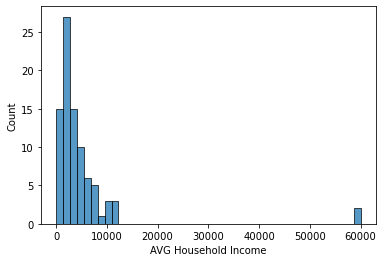

In [20]:
data = data[data['AVG Household Income'].notnull()]
sns.histplot(data['AVG Household Income'])

In [21]:
data[data['AVG Household Income'] == 60000]

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income
4257,3n7unkoc72m6d4jn,Matilda,60000.0,Yes,2013-08-27,Sacramento,CA,60000.0
4258,3n7unkoc72m6d4jn,Landon,60000.0,Yes,2009-09-19,Sacramento,CA,60000.0


C:\Users\arash\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


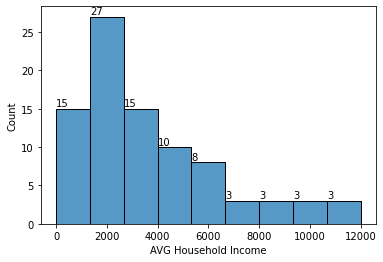

In [22]:
data.loc[data['AVG Household Income'] == 60000, 'AVG Household Income'] = 6000.0


ax = sns.histplot(data['AVG Household Income'])

for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+4.25, p.get_height()+.3)) 
plt.show()

In [23]:
data.ID.value_counts()

m6156p61vd1lq5c8    3
79715lt1aq59idnq    3
fhq2d8pfeh8a9na4    3
mk6t4l5da8m1dss2    3
hil50gpk08pak286    3
sn7tnalsq70eui1l    3
4p1gqldb36ldocmb    3
nfi2m31sr811qbaq    3
9pvkmps8quscn1o1    3
eo83ce5cb1u3er5m    3
846fkuqo0nentnu5    3
gdahf3t8bu83ud0e    2
8avjs5cl2erp2ktc    2
47jt5k9qtflndops    2
mqdqcf5h52bc4cj1    2
cm10nprhrb0u3lum    2
onfmuf5l373k26jk    2
3n7unkoc72m6d4jn    2
8rd7tpke0n51hkeq    2
fih2b5sso3d2fjq2    2
9p197dbbnq5p0om4    2
on21oh07948391n7    2
rso35m0jpv9jufk7    2
c9adv6jjm1nm1ao2    2
19sh5fa544e8dcge    2
1n7itrh3k8mq3ngb    1
1iqdan411s84auhj    1
fo5nfecmbrthda2s    1
vhp4ueplcke166as    1
m6sn704dilop2mph    1
dg00cdau1tt4bot5    1
jp0ev28sqcl4cnpc    1
sb8ukb4q60iibvlp    1
6lho9jeshote6ed5    1
a48i52hl2eq21od     1
phenfmf9nertkth8    1
5a7i1fep1jl4fhvt    1
2vnholkgh93gii5r    1
pt5vhgs3se26cmi6    1
uupsrlnp9agatf2e    1
tn23flfam5n4sqk4    1
1q26v0rlhnjjvajt    1
uesouspc8aj4pu5o    1
o04ckbl5scm53ds3    1
5sre79je95mkrgeg    1
q90m1fkc09

In [24]:
data.ID.value_counts()

m6156p61vd1lq5c8    3
79715lt1aq59idnq    3
fhq2d8pfeh8a9na4    3
mk6t4l5da8m1dss2    3
hil50gpk08pak286    3
sn7tnalsq70eui1l    3
4p1gqldb36ldocmb    3
nfi2m31sr811qbaq    3
9pvkmps8quscn1o1    3
eo83ce5cb1u3er5m    3
846fkuqo0nentnu5    3
gdahf3t8bu83ud0e    2
8avjs5cl2erp2ktc    2
47jt5k9qtflndops    2
mqdqcf5h52bc4cj1    2
cm10nprhrb0u3lum    2
onfmuf5l373k26jk    2
3n7unkoc72m6d4jn    2
8rd7tpke0n51hkeq    2
fih2b5sso3d2fjq2    2
9p197dbbnq5p0om4    2
on21oh07948391n7    2
rso35m0jpv9jufk7    2
c9adv6jjm1nm1ao2    2
19sh5fa544e8dcge    2
1n7itrh3k8mq3ngb    1
1iqdan411s84auhj    1
fo5nfecmbrthda2s    1
vhp4ueplcke166as    1
m6sn704dilop2mph    1
dg00cdau1tt4bot5    1
jp0ev28sqcl4cnpc    1
sb8ukb4q60iibvlp    1
6lho9jeshote6ed5    1
a48i52hl2eq21od     1
phenfmf9nertkth8    1
5a7i1fep1jl4fhvt    1
2vnholkgh93gii5r    1
pt5vhgs3se26cmi6    1
uupsrlnp9agatf2e    1
tn23flfam5n4sqk4    1
1q26v0rlhnjjvajt    1
uesouspc8aj4pu5o    1
o04ckbl5scm53ds3    1
5sre79je95mkrgeg    1
q90m1fkc09

In [25]:
duplicateRows = df1[df1.duplicated(['ID', 'First Name', 'Date of Birth'])]
duplicateRows

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income
34,669fasfgrrd204ru,Kailie,NaN,Yes,2006-05-04,East,FL,NaN
35,669fasfgrrd204ru,Andrew,NaN,Yes,2005-03-15,East,FL,NaN
38,669fasfgrrd204ru,Nolan,NaN,Yes,2009-08-19,East,FL,NaN
39,669fasfgrrd204ru,Lauren,NaN,Yes,2008-12-29,East,FL,NaN
121,rijv7ktqts8e67gs,Eva,NaN,Yes,2017-02-08,Central,TX,NaN
...,...,...,...,...,...,...,...,...
4189,8avjs5cl2erp2ktc,Ava,557.0,No,2018-10-25,SoCal,CA,1328.5
4190,8avjs5cl2erp2ktc,Zoe,557.0,No,2008-10-25,SoCal,CA,1328.5
4252,1q26v0rlhnjjvajt,Emalie,4000.0,Yes,2016-03-08,SoCal,CA,3250.0
4546,5qemkdsig3pnjo04,Christopher,2080.0,No,2009-09-26,Bay Area,CA,3040.0


In [26]:
df2 = df1[~df1.duplicated(['ID', 'First Name', 'Date of Birth'])]
df2

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income
0,p3do03ecr7t67spn,Jayzua-nae,NaN,Yes,2011-04-20,East,NC,NaN
1,p3do03ecr7t67spn,Jason,NaN,Yes,2009-01-09,East,NC,NaN
2,p3do03ecr7t67spn,Janyla,NaN,Yes,2012-11-23,East,NC,NaN
3,sfkib3fm5afbg4lv,Maxim,NaN,No,2009-01-20,Bay Area,CA,NaN
4,sfkib3fm5afbg4lv,Nicole,NaN,No,2011-05-27,Bay Area,CA,NaN
...,...,...,...,...,...,...,...,...
4856,q26l9nm5rr6n4rve,Leon,NaN,No,2018-03-09,East,GA,NaN
4857,4busp4hui2rlhfjn,Ariel,NaN,No,2012-06-19,East,AL,NaN
4858,fqt3n1in42ddp0ov,Cole,NaN,No,2009-10-10,Washington,WA,NaN
4859,vjb2sfvo1injlen0,kaiden,NaN,Yes,2014-04-11,East,NC,NaN


Now that I delete duplicate and missing data, I will add the age and gender column. 

#### Age

For age, I assume it's 2032 instead of 2022 so that the monthly income for kids have better reasonig. Also I just substract the year part of date of birth from 2032 instead of writing a function to calculate the exact age just for simplicity.


#### Gender

For gender attribute, I will use a gender_guesser package to guess the gender of the each person.


In [27]:
df2['year'] = pd.DatetimeIndex(df2['Date of Birth']).year
df2['Age'] = 2032 - df2.year
df2.Age.value_counts().sort_index()

<ipython-input-27-46b370aa0d4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = pd.DatetimeIndex(df2['Date of Birth']).year
<ipython-input-27-46b370aa0d4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = 2032 - df2.year


-174      1
 11      73
 12     182
 13     228
 14     251
       ... 
 83       2
 84       1
 89       1
 90       1
 127      1
Name: Age, Length: 66, dtype: int64

In [28]:
df2[df2.Age == -174]

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income,year,Age
1258,u3oms3hqg1orep1s,Kyara,NaN,Yes,2206-07-31,Southwest,AZ,NaN,2206,-174


In [29]:
df2.loc[df2.Age == -174, 'year'] = 2006

C:\Users\arash\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [30]:
df2[df2.Age == 127]

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income,year,Age
3349,9p197dbbnq5p0om4,Chouida,NaN,No,1905-11-14,Bay Area,CA,10000.0,1905,127


In [31]:
df2.loc[df2.Age == 127, 'year'] = 1995

C:\Users\arash\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [32]:
df2['Age'] = 2032 - df2.year
df2 = df2.drop(['year'], axis=1)
df2.Age.value_counts().sort_index()

<ipython-input-32-487d3eb71b9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = 2032 - df2.year


11     73
12    182
13    228
14    251
15    271
     ... 
82      1
83      2
84      1
89      1
90      1
Name: Age, Length: 64, dtype: int64

In [33]:
import gender_guesser.detector as gender
d = gender.Detector()

In [34]:
n = len(df2['ID'])
df2 = df2.reset_index(drop=True)

for i in range(n):
    df2.loc[i, 'Gender'] = d.get_gender(df2.loc[i, 'First Name'])

In [35]:
df2.Gender.value_counts()

male             1564
unknown          1554
female           1268
mostly_male       182
mostly_female      91
andy               75
Name: Gender, dtype: int64

In [36]:
for i in range(n):
    if df2.loc[i, 'Gender'] == 'mostly_male':
        df2.loc[i, 'Gender'] = 'male'
    elif df2.loc[i, 'Gender'] == 'mostly_female':
        df2.loc[i, 'Gender'] = 'female'
    elif df2.loc[i, 'Gender'] == 'andy':
        df2.loc[i, 'Gender'] = 'male'

In [37]:
df2.Gender.value_counts()

male       1821
unknown    1554
female     1359
Name: Gender, dtype: int64

In [38]:
df2['Age Group'] = pd.cut(df2['Age'], [-1, 14, 24, 64, 99], labels=['Children', 'Youth', 'Adult', 'Seniors'])

In [39]:
df2

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income,Age,Gender,Age Group
0,p3do03ecr7t67spn,Jayzua-nae,NaN,Yes,2011-04-20,East,NC,NaN,21,unknown,Youth
1,p3do03ecr7t67spn,Jason,NaN,Yes,2009-01-09,East,NC,NaN,23,male,Youth
2,p3do03ecr7t67spn,Janyla,NaN,Yes,2012-11-23,East,NC,NaN,20,unknown,Youth
3,sfkib3fm5afbg4lv,Maxim,NaN,No,2009-01-20,Bay Area,CA,NaN,23,male,Youth
4,sfkib3fm5afbg4lv,Nicole,NaN,No,2011-05-27,Bay Area,CA,NaN,21,female,Youth
...,...,...,...,...,...,...,...,...,...,...,...
4729,q26l9nm5rr6n4rve,Leon,NaN,No,2018-03-09,East,GA,NaN,14,male,Children
4730,4busp4hui2rlhfjn,Ariel,NaN,No,2012-06-19,East,AL,NaN,20,male,Youth
4731,fqt3n1in42ddp0ov,Cole,NaN,No,2009-10-10,Washington,WA,NaN,23,male,Youth
4732,vjb2sfvo1injlen0,kaiden,NaN,Yes,2014-04-11,East,NC,NaN,18,unknown,Youth


In [40]:
a = df2.groupby('ID')['Age'].max().sort_index()
b = df2.groupby('ID')['Age'].min().sort_index()
c = df2.groupby('ID')['Age'].count().sort_index()
d = a - b 

df_age = pd.concat([a, b, c, d], axis=1)
names = ['Max', 'Min', 'Number', 'Gap']
df_age.columns = names
#df_age[(df_age.Min > 15) & (d < 20)]

df_age

,Max,Min,Number,Gap
ID,,,,
1036esvlf765gpvf,26,17,5,9
103ets9k5pi1lb4c,15,15,1,0
10meigo5d37fh0nf,18,18,1,0
10ppscvogqrlda8i,50,50,1,0
11kipbq7epnv7gn1,27,25,2,2
...,...,...,...,...
vuvs5i7ts942hnq2,28,18,2,10
vv3gnlnaghf2vm27,23,12,2,11
vv5bj18ule2sg5q0,22,15,3,7


In [41]:
df2 = df2.merge(df_age, left_on='ID', right_on='ID')

#df2 = df2.drop(['ID1'], axis=1)
df2

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income,Age,Gender,Age Group,Max,Min,Number,Gap
0,p3do03ecr7t67spn,Jayzua-nae,NaN,Yes,2011-04-20,East,NC,NaN,21,unknown,Youth,23,20,3,3
1,p3do03ecr7t67spn,Jason,NaN,Yes,2009-01-09,East,NC,NaN,23,male,Youth,23,20,3,3
2,p3do03ecr7t67spn,Janyla,NaN,Yes,2012-11-23,East,NC,NaN,20,unknown,Youth,23,20,3,3
3,sfkib3fm5afbg4lv,Maxim,NaN,No,2009-01-20,Bay Area,CA,NaN,23,male,Youth,44,21,3,23
4,sfkib3fm5afbg4lv,Nicole,NaN,No,2011-05-27,Bay Area,CA,NaN,21,female,Youth,44,21,3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,q26l9nm5rr6n4rve,Leon,NaN,No,2018-03-09,East,GA,NaN,14,male,Children,14,14,1,0
4730,4busp4hui2rlhfjn,Ariel,NaN,No,2012-06-19,East,AL,NaN,20,male,Youth,20,20,1,0
4731,fqt3n1in42ddp0ov,Cole,NaN,No,2009-10-10,Washington,WA,NaN,23,male,Youth,23,23,1,0
4732,vjb2sfvo1injlen0,kaiden,NaN,Yes,2014-04-11,East,NC,NaN,18,unknown,Youth,18,18,1,0


In [42]:
df2['No Children'] = (df2.Min > 15) & (df2.Gap < 20)
df2

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income,Age,Gender,Age Group,Max,Min,Number,Gap,No Children
0,p3do03ecr7t67spn,Jayzua-nae,NaN,Yes,2011-04-20,East,NC,NaN,21,unknown,Youth,23,20,3,3,True
1,p3do03ecr7t67spn,Jason,NaN,Yes,2009-01-09,East,NC,NaN,23,male,Youth,23,20,3,3,True
2,p3do03ecr7t67spn,Janyla,NaN,Yes,2012-11-23,East,NC,NaN,20,unknown,Youth,23,20,3,3,True
3,sfkib3fm5afbg4lv,Maxim,NaN,No,2009-01-20,Bay Area,CA,NaN,23,male,Youth,44,21,3,23,False
4,sfkib3fm5afbg4lv,Nicole,NaN,No,2011-05-27,Bay Area,CA,NaN,21,female,Youth,44,21,3,23,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,q26l9nm5rr6n4rve,Leon,NaN,No,2018-03-09,East,GA,NaN,14,male,Children,14,14,1,0,False
4730,4busp4hui2rlhfjn,Ariel,NaN,No,2012-06-19,East,AL,NaN,20,male,Youth,20,20,1,0,True
4731,fqt3n1in42ddp0ov,Cole,NaN,No,2009-10-10,Washington,WA,NaN,23,male,Youth,23,23,1,0,True
4732,vjb2sfvo1injlen0,kaiden,NaN,Yes,2014-04-11,East,NC,NaN,18,unknown,Youth,18,18,1,0,True


# gender 

C:\Users\arash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


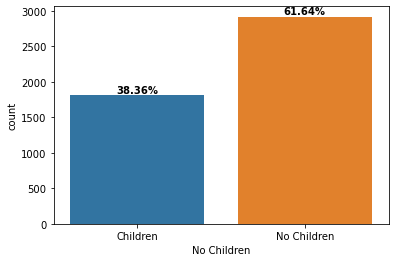

In [43]:
ax = sns.countplot(df2['No Children'])

ax.set_xticklabels(['Children', 'No Children']);

percentage = []

n = [False, True]
for i in n:
    pct = (df2['No Children'] == i).sum() / len(df2['No Children']) * 100
    percentage.append(round(pct,2))
#df2['Percentage'] = percentage

i = 0
for p in ax.patches: 
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1 
    
plt.show();

C:\Users\arash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


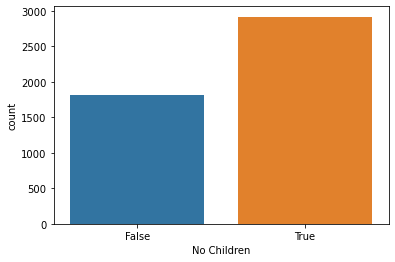

In [44]:
ax = sns.countplot(df2['No Children'])

C:\Users\arash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


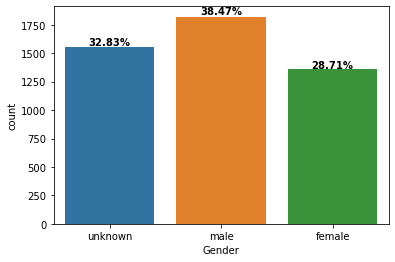

In [45]:
ax = sns.countplot(df2.Gender)

percentage = []

n = list(df2.Gender.unique())
for i in n:
    pct = (df2.Gender == i).sum() / len(df2.Gender) * 100
    percentage.append(round(pct,2))
#df2['Percentage'] = percentage

i = 0
for p in ax.patches: 
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1 
    
plt.show();

C:\Users\arash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


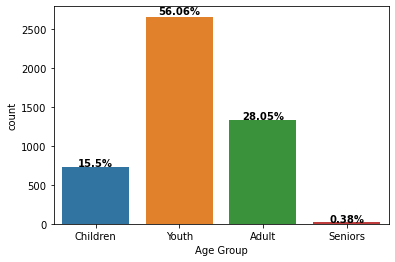

In [46]:
ax = sns.countplot(df2['Age Group'])

n = ['Children', 'Youth', 'Adult', 'Seniors']

percentage = []

for i in n:
    pct = (df2['Age Group'] == i).sum() / len(df2['Age Group'] ) * 100
    percentage.append(round(pct,2))


i = 0
for p in ax.patches: 
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1 
    
plt.show()

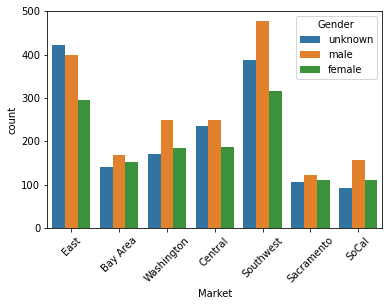

In [47]:
sns.countplot(df2.Market, hue=df2.Gender)
plt.xticks(rotation=45);

C:\Users\arash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


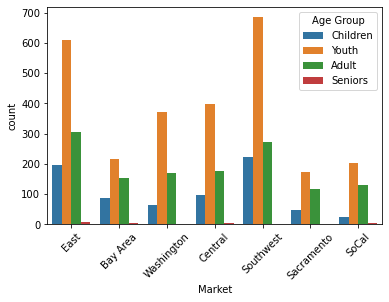

In [48]:
sns.countplot(df2.Market, hue=df2['Age Group'])
plt.xticks(rotation=45);

C:\Users\arash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


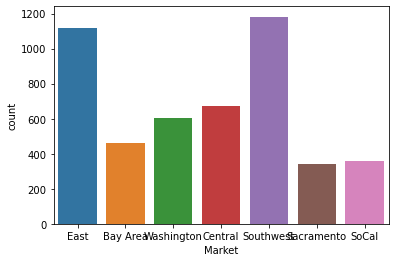

In [49]:
sns.countplot(df2.Market);

C:\Users\arash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


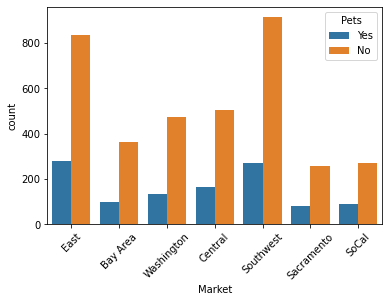

In [50]:
sns.countplot(df2.Market, hue=df2.Pets)
plt.xticks(rotation=45);

C:\Users\arash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Market', ylabel='count'>

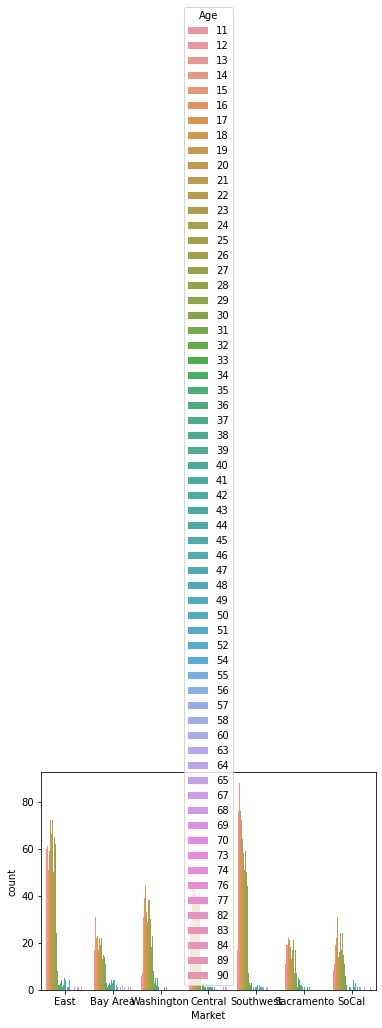

In [51]:
sns.countplot(df2.Market, hue=df2.Age)

In [52]:
df2['Age_group'] = pd.cut(df2['Age'], [-1, 14, 24, 64, 99], labels=['Children', 'Youth', 'Adult', 'Seniors'])

In [53]:
df2

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income,Age,Gender,Age Group,Max,Min,Number,Gap,No Children,Age_group
0,p3do03ecr7t67spn,Jayzua-nae,NaN,Yes,2011-04-20,East,NC,NaN,21,unknown,Youth,23,20,3,3,True,Youth
1,p3do03ecr7t67spn,Jason,NaN,Yes,2009-01-09,East,NC,NaN,23,male,Youth,23,20,3,3,True,Youth
2,p3do03ecr7t67spn,Janyla,NaN,Yes,2012-11-23,East,NC,NaN,20,unknown,Youth,23,20,3,3,True,Youth
3,sfkib3fm5afbg4lv,Maxim,NaN,No,2009-01-20,Bay Area,CA,NaN,23,male,Youth,44,21,3,23,False,Youth
4,sfkib3fm5afbg4lv,Nicole,NaN,No,2011-05-27,Bay Area,CA,NaN,21,female,Youth,44,21,3,23,False,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,q26l9nm5rr6n4rve,Leon,NaN,No,2018-03-09,East,GA,NaN,14,male,Children,14,14,1,0,False,Children
4730,4busp4hui2rlhfjn,Ariel,NaN,No,2012-06-19,East,AL,NaN,20,male,Youth,20,20,1,0,True,Youth
4731,fqt3n1in42ddp0ov,Cole,NaN,No,2009-10-10,Washington,WA,NaN,23,male,Youth,23,23,1,0,True,Youth
4732,vjb2sfvo1injlen0,kaiden,NaN,Yes,2014-04-11,East,NC,NaN,18,unknown,Youth,18,18,1,0,True,Youth


In [54]:
df3 = df2
df3['Monthly Income'] = df2['Monthly Income'].fillna(0)

df2['Income Group'] = pd.cut(df3['Monthly Income'], [-1, 1, 4000, 8000, np.inf], 
                             labels=['Not Given', 'Low', 'Middle', 'High'])
df2

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income,Age,Gender,Age Group,Max,Min,Number,Gap,No Children,Age_group,Income Group
0,p3do03ecr7t67spn,Jayzua-nae,0.0,Yes,2011-04-20,East,NC,NaN,21,unknown,Youth,23,20,3,3,True,Youth,Not Given
1,p3do03ecr7t67spn,Jason,0.0,Yes,2009-01-09,East,NC,NaN,23,male,Youth,23,20,3,3,True,Youth,Not Given
2,p3do03ecr7t67spn,Janyla,0.0,Yes,2012-11-23,East,NC,NaN,20,unknown,Youth,23,20,3,3,True,Youth,Not Given
3,sfkib3fm5afbg4lv,Maxim,0.0,No,2009-01-20,Bay Area,CA,NaN,23,male,Youth,44,21,3,23,False,Youth,Not Given
4,sfkib3fm5afbg4lv,Nicole,0.0,No,2011-05-27,Bay Area,CA,NaN,21,female,Youth,44,21,3,23,False,Youth,Not Given
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,q26l9nm5rr6n4rve,Leon,0.0,No,2018-03-09,East,GA,NaN,14,male,Children,14,14,1,0,False,Children,Not Given
4730,4busp4hui2rlhfjn,Ariel,0.0,No,2012-06-19,East,AL,NaN,20,male,Youth,20,20,1,0,True,Youth,Not Given
4731,fqt3n1in42ddp0ov,Cole,0.0,No,2009-10-10,Washington,WA,NaN,23,male,Youth,23,23,1,0,True,Youth,Not Given
4732,vjb2sfvo1injlen0,kaiden,0.0,Yes,2014-04-11,East,NC,NaN,18,unknown,Youth,18,18,1,0,True,Youth,Not Given


C:\Users\arash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Market', ylabel='Age'>

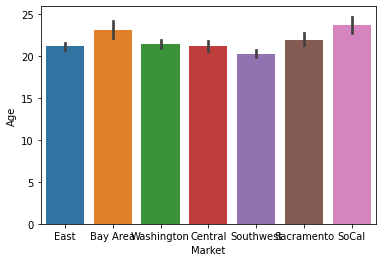

In [55]:
sns.barplot(df2['Market'], df2['Age'])

<AxesSubplot:>

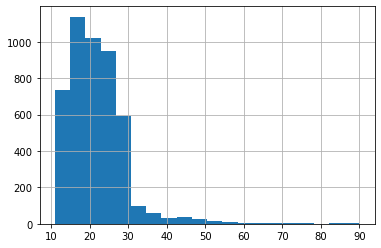

In [56]:
df2.Age.hist(bins=20)

C:\Users\arash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Market', ylabel='Age'>

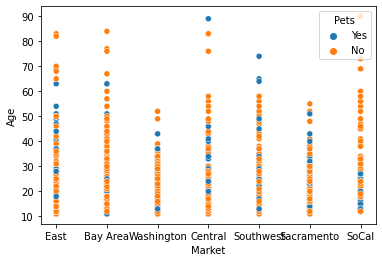

In [57]:
sns.scatterplot(df2['Market'], df2['Age'], hue=df2['Pets'])

In [58]:
cross_table = pd.crosstab(index=df2["Age_group"], 
                          columns=df2["Pets"])
cross_table

Pets,No,Yes
Age_group,,
Children,584,150
Youth,2071,583
Adult,952,376
Seniors,14,4


<AxesSubplot:xlabel='Age_group'>

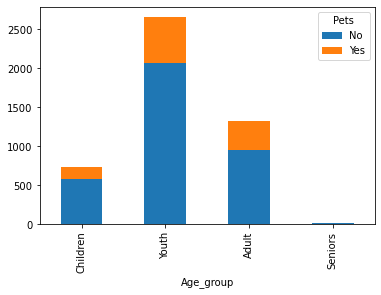

In [59]:
cross_table.plot(kind="bar",
                 stacked=True)

C:\Users\arash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


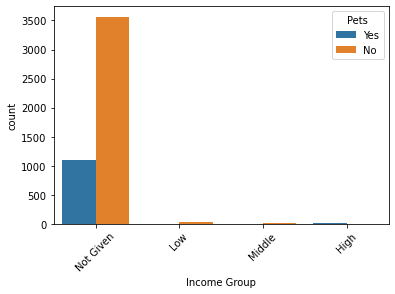

In [60]:
sns.countplot(df2['Income Group'], hue=df2.Pets)
plt.xticks(rotation=45);

In [61]:
b = df2.groupby('ID')['Age'].min().sort_index()
c = df2.groupby('ID')['Age'].count().sort_index()
d = a - b 

df_age = pd.concat([a, b, c, d], axis=1)
names = ['Max', 'Min', 'Number', 'Gap']
df_age.columns = names
df_age[(df_age.Min > 15) & (d < 20)]

,Max,Min,Number,Gap
ID,,,,
1036esvlf765gpvf,26,17,5,9
10meigo5d37fh0nf,18,18,1,0
10ppscvogqrlda8i,50,50,1,0
11kipbq7epnv7gn1,27,25,2,2
11nuhncc0lo8g5dk,54,54,1,0
...,...,...,...,...
vt41fs725kc1vb3h,29,29,1,0
vtns3fkj35vk8dkm,30,30,1,0
vuvs5i7ts942hnq2,28,18,2,10


In [62]:
n = len(df_age[(df_age.Min > 15) & (d < 20)]) / len(df2)
n

0.35107731305449935

### 2. EDA

TypeError: 'AxesSubplot' object does not support item assignment

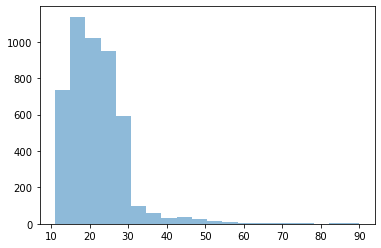

In [63]:

ax[0] = plt.hist(df2.Age, alpha=0.5, bins=20)

plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution')

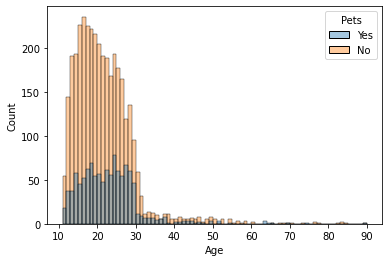

In [64]:
#plt.figure(figsize=(20, 10))

bins = df2.Age.max() - df2.Age.min()
sns.histplot(x=df2.Age, hue=df2.Pets, alpha=.4, bins=bins);


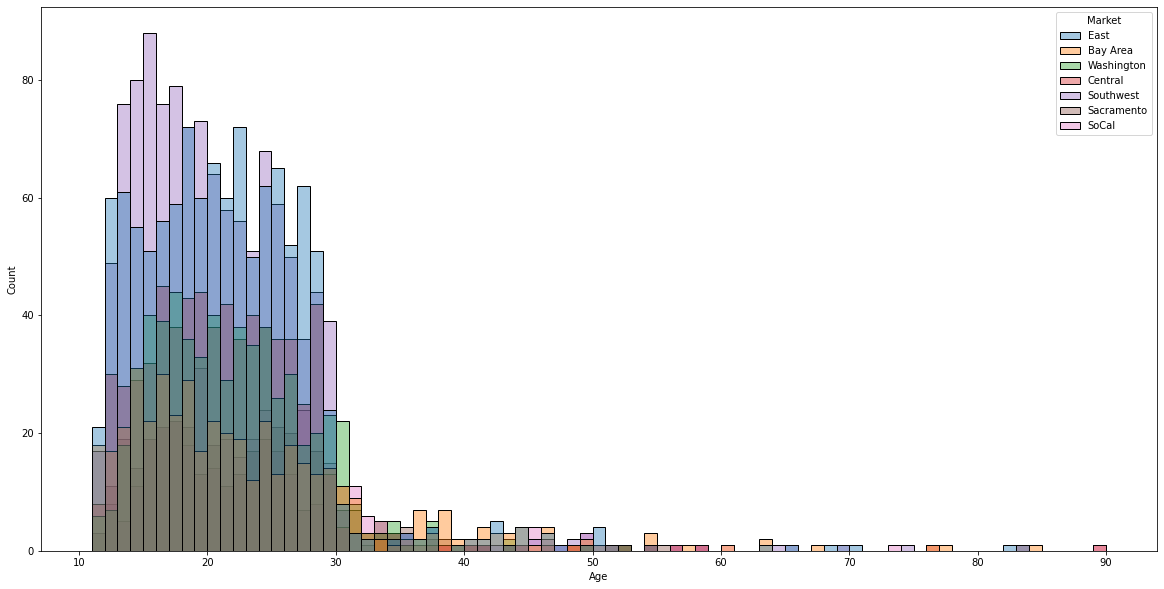

In [65]:
plt.figure(figsize=(20, 10))

bins = df2.Age.max() - df2.Age.min()
sns.histplot(x=df2.Age, hue=df2.Market, alpha=.4, bins=bins);


60

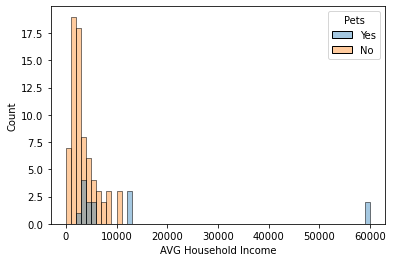

In [66]:
#plt.figure(figsize=(20, 10))

bins = 60
sns.histplot(x=df2['AVG Household Income'], hue=df2.Pets, alpha=.4, bins=bins);
bins

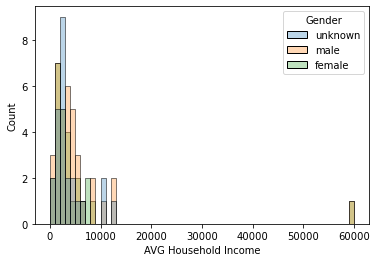

In [67]:
#plt.figure(figsize=(20, 10))

bins = 60
sns.histplot(x=df2['AVG Household Income'], hue=df2.Gender, alpha=.3, bins=bins);


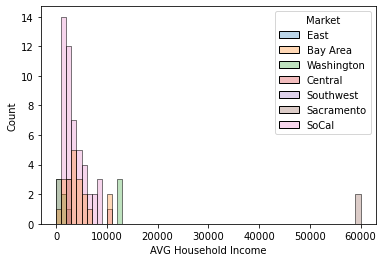

In [68]:

sns.histplot(x=df2['AVG Household Income'], hue=df2.Market, alpha=.3, bins=bins);

60

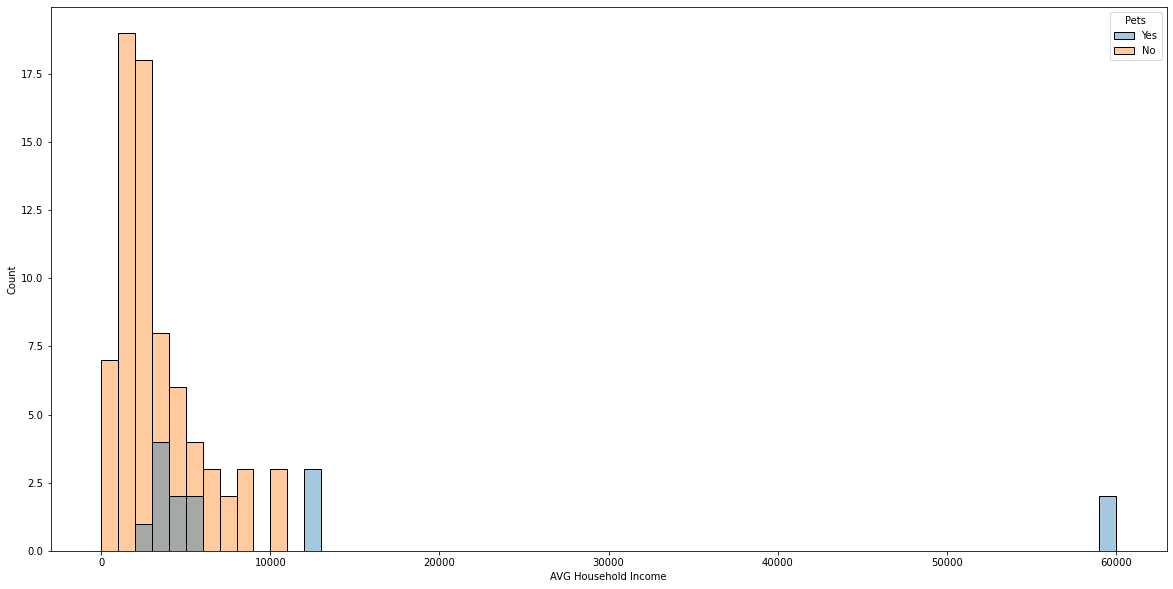

In [69]:
plt.figure(figsize=(20, 10))

bins = 60
sns.histplot(x=df2['AVG Household Income'], hue=df2.Pets, alpha=.4, bins=bins);
bins

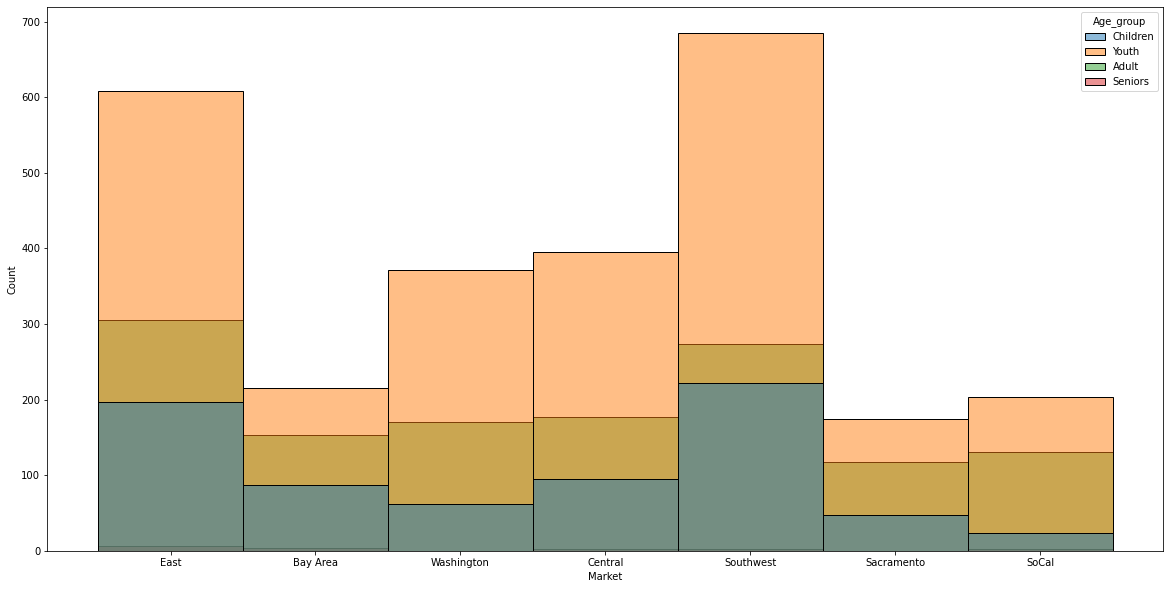

In [70]:
plt.figure(figsize=(20, 10))

bins = df2.Age.max() - df2.Age.min()
sns.histplot(x=df2.Market, hue=df2['Age_group'], alpha=.5);


In [71]:
df_income = df2[df2['Monthly Income'].notnull()]
df_income

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,AVG Household Income,Age,Gender,Age Group,Max,Min,Number,Gap,No Children,Age_group,Income Group
0,p3do03ecr7t67spn,Jayzua-nae,0.0,Yes,2011-04-20,East,NC,NaN,21,unknown,Youth,23,20,3,3,True,Youth,Not Given
1,p3do03ecr7t67spn,Jason,0.0,Yes,2009-01-09,East,NC,NaN,23,male,Youth,23,20,3,3,True,Youth,Not Given
2,p3do03ecr7t67spn,Janyla,0.0,Yes,2012-11-23,East,NC,NaN,20,unknown,Youth,23,20,3,3,True,Youth,Not Given
3,sfkib3fm5afbg4lv,Maxim,0.0,No,2009-01-20,Bay Area,CA,NaN,23,male,Youth,44,21,3,23,False,Youth,Not Given
4,sfkib3fm5afbg4lv,Nicole,0.0,No,2011-05-27,Bay Area,CA,NaN,21,female,Youth,44,21,3,23,False,Youth,Not Given
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,q26l9nm5rr6n4rve,Leon,0.0,No,2018-03-09,East,GA,NaN,14,male,Children,14,14,1,0,False,Children,Not Given
4730,4busp4hui2rlhfjn,Ariel,0.0,No,2012-06-19,East,AL,NaN,20,male,Youth,20,20,1,0,True,Youth,Not Given
4731,fqt3n1in42ddp0ov,Cole,0.0,No,2009-10-10,Washington,WA,NaN,23,male,Youth,23,23,1,0,True,Youth,Not Given
4732,vjb2sfvo1injlen0,kaiden,0.0,Yes,2014-04-11,East,NC,NaN,18,unknown,Youth,18,18,1,0,True,Youth,Not Given


In [72]:
df_income = df_income[df_income['Monthly Income'] > 2]

(array([14., 16.,  6.,  4.,  9.,  4.,  0.,  4.,  0.,  3.,  1.,  3.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  800.        ,  1803.38983051,  2806.77966102,  3810.16949153,
         4813.55932203,  5816.94915254,  6820.33898305,  7823.72881356,
         8827.11864407,  9830.50847458, 10833.89830508, 11837.28813559,
        12840.6779661 , 13844.06779661, 14847.45762712, 15850.84745763,
        16854.23728814, 17857.62711864, 18861.01694915, 19864.40677966,
        20867.79661017, 21871.18644068, 22874.57627119, 23877.96610169,
        24881.3559322 , 25884.74576271, 26888.13559322, 27891.52542373,
        28894.91525424, 29898.30508475, 30901.69491525, 31905.08474576,
        32908.47457627, 33911.86440678, 34915.25423729, 35918.6440678 ,
        36922.0

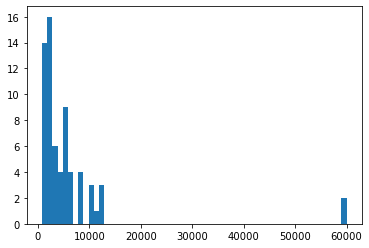

In [73]:
bins = df_income['Monthly Income'].max() - df_income['Monthly Income'].min()
plt.hist(df_income['Monthly Income'], bins=int(bins/1000))

In [74]:
df_income['Monthly Income'].value_counts().sort_index()

800.00      1
840.00      1
1200.00     2
1500.00     2
1650.00     3
1680.00     2
1700.00     1
1780.00     1
1793.00     1
1920.00     3
1925.00     1
2000.00     1
2100.00     2
2122.00     1
2160.00     1
2224.39     2
2400.00     2
2500.00     2
2580.00     1
2823.36     1
3000.00     1
3033.00     1
3200.00     2
3552.00     1
4000.00     3
4333.00     1
4960.00     2
5000.00     2
5060.00     2
5600.00     1
5800.00     2
5856.00     1
6000.00     1
6258.66     1
6819.08     1
7900.00     2
8000.00     1
8664.00     1
10000.00    3
11833.00    1
12000.00    3
60000.00    2
Name: Monthly Income, dtype: int64

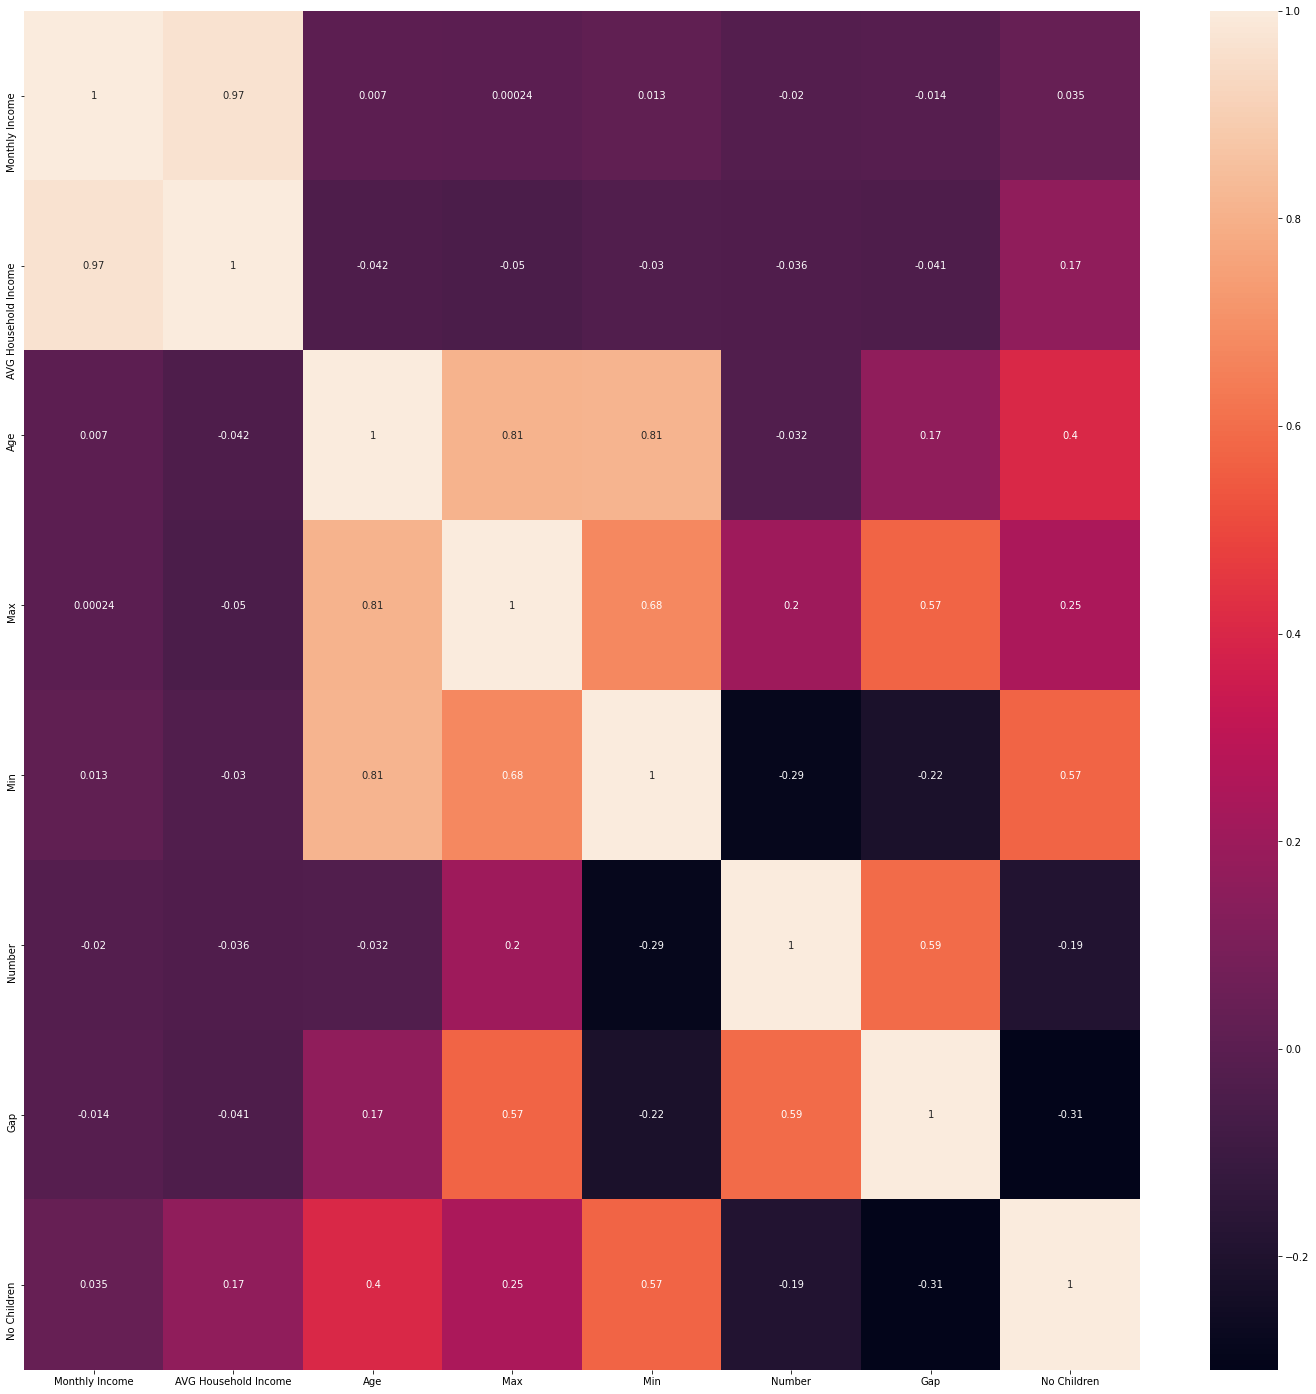

In [75]:
plt.figure(figsize=(25,25))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [76]:
plt.figure(figsize=(25,25))
sns.heatmap(X_std.corr(),annot=True)
plt.show()

NameError: name 'X_std' is not defined

<Figure size 1800x1800 with 0 Axes>

## 3. Model

In [77]:
X = df2.drop(['ID', 'First Name', 'Monthly Income', 'Date of Birth', 'Age', 'State', 'Min', 'Max', 'Number',
             'Gap', 'AVG Household Income'], axis=1)

In [78]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

C:\Users\arash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:827: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn("algorithm='elkan' doesn't make sense for a single "


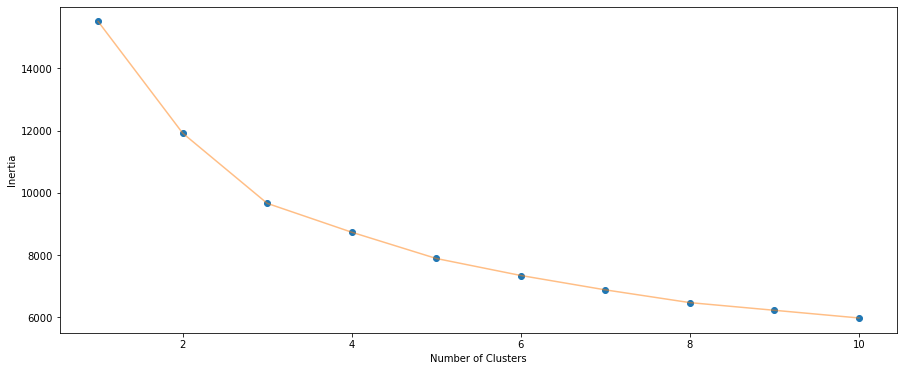

In [79]:
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(pd.get_dummies(X))
    inertia.append(algorithm.inertia_)
    
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

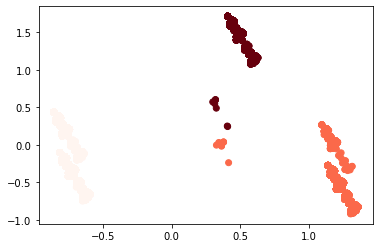

In [80]:
from sklearn.decomposition import PCA
X_std = pd.get_dummies(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_std)

# Visualizing the clustering 
plt.scatter(X_pca[:,0], X_pca[:,1],  
           c = KMeans(n_clusters = 3).fit_predict(X_std), cmap ='Reds')
            
plt.show() 

In [81]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

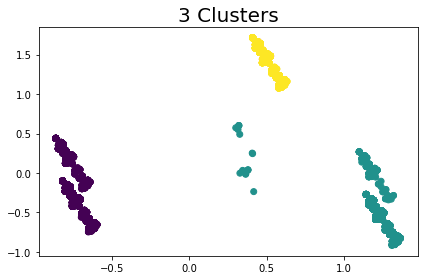

In [82]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
        
plt.title('3 Clusters', fontsize=20) 
plt.tight_layout()
plt.show()

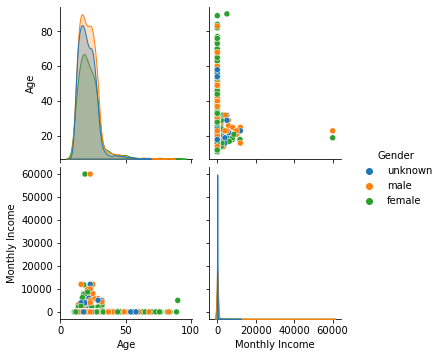

In [83]:
sns.pairplot(vars= ['Age', 'Monthly Income'], hue='Gender', data=df2)

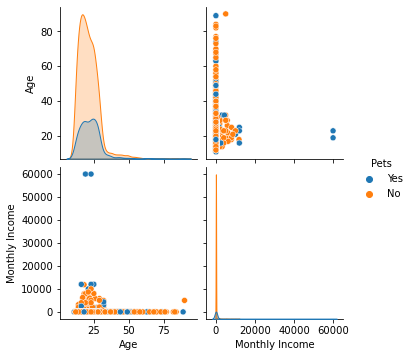

In [84]:
sns.pairplot(vars= ['Age', 'Monthly Income'], hue='Pets', data=df2)

C:\Users\arash\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\arash\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


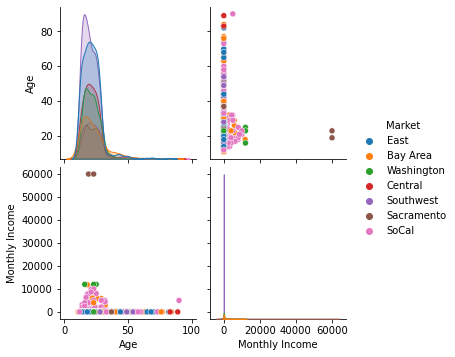

In [85]:
sns.pairplot(vars= ['Age', 'Monthly Income'], hue='Market', data=df2)

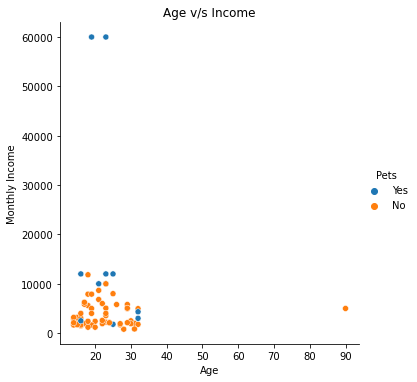

In [86]:
sns.relplot(x='Age',y='Monthly Income',hue='Pets',data=df_income);
plt.title('Age v/s Income');

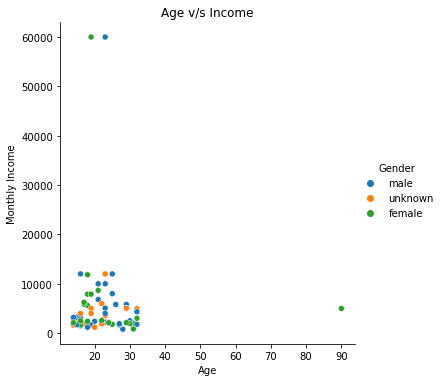

In [87]:
sns.relplot(x='Age',y='Monthly Income',hue='Gender',data=df_income);
plt.title('Age v/s Income');

KeyError: 'Pet Counts'

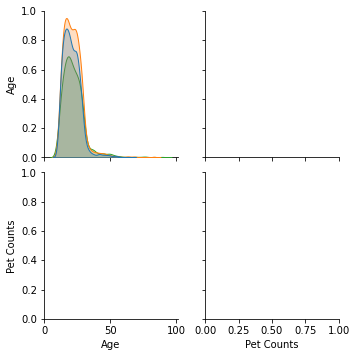

In [88]:
df4= df2.groupby('Age')['Pets'].count()
sns.pairplot(vars= ['Age', 'Pet Counts'], hue='Gender', data=df2)

Text(0, 0.5, 'Number of Pets')

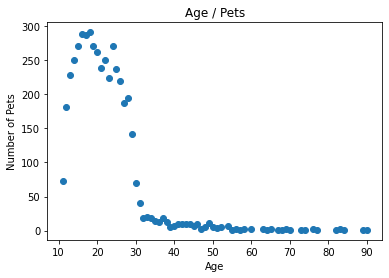

In [89]:
plt.scatter(df4.index, df4)
plt.title('Age / Pets')
plt.xlabel('Age')
plt.ylabel('Number of Pets')

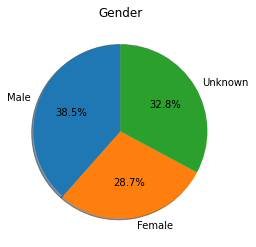

In [90]:
label = 'Male','Female', 'Unknown'

plt.pie([len(df2['Gender'][df2['Gender']=='male']), len(df2['Gender'][df2['Gender']=='female']),
        len(df2['Gender'][df2['Gender']=='unknown'])],
            labels=label,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Gender');

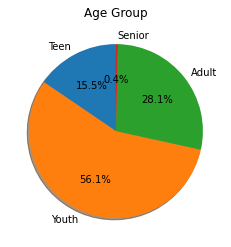

In [91]:
label = 'Teen','Youth', 'Adult', 'Senior'

plt.pie([len(df2['Age Group'][df2['Age Group']=='Children']), len(df2['Age Group'][df2['Age Group']=='Youth']),
        len(df2['Age Group'][df2['Age Group']=='Adult']), len(df2['Age Group'][df2['Age Group']=='Seniors'])],
            labels=label,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Age Group');

(array([7.340e+02, 1.137e+03, 1.022e+03, 9.510e+02, 5.940e+02, 9.800e+01,
        5.700e+01, 3.200e+01, 3.600e+01, 2.500e+01, 1.600e+01, 8.000e+00,
        2.000e+00, 6.000e+00, 5.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        3.000e+00, 2.000e+00]),
 array([11.  , 14.95, 18.9 , 22.85, 26.8 , 30.75, 34.7 , 38.65, 42.6 ,
        46.55, 50.5 , 54.45, 58.4 , 62.35, 66.3 , 70.25, 74.2 , 78.15,
        82.1 , 86.05, 90.  ]),
 <BarContainer object of 20 artists>)

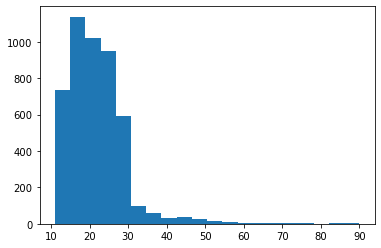

In [92]:
plt.hist(df2.Age, bins=20)

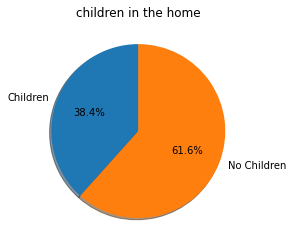

In [95]:
label = 'Children','No Children'

plt.pie([len(df2['No Children'][df2['No Children']==False]), len(df2['No Children'][df2['No Children']==True])],
            labels=label,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('children in the home');

In [96]:
cross_table = pd.crosstab(index=df2["No Children"], 
                          columns=df2["Pets"])
cross_table

Pets,No,Yes
No Children,,
False,1491,325
True,2130,788


<AxesSubplot:xlabel='No Children'>

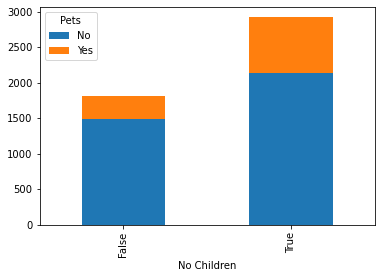

In [97]:
cross_table.plot(kind="bar",
                 stacked=True)

In [99]:
cross_table = pd.crosstab(index=df2["No Children"], 
                          columns=df2["Age Group"])
cross_table

Age Group,Children,Youth,Adult,Seniors
No Children,,,,
False,734,909,165,8
True,0,1745,1163,10


<AxesSubplot:xlabel='No Children'>

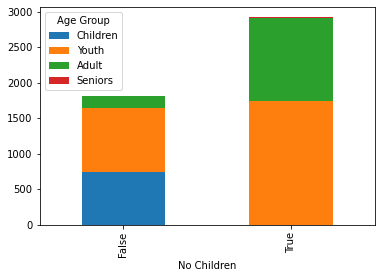

In [100]:
cross_table.plot(kind="bar",
                 stacked=True)

In [108]:
cross_table = pd.crosstab(index=df2[df2["Income Group"].isin(['Low', 'Middle', 'High'])]["No Children"], 
                          columns=df2["Income Group"])
cross_table

Income Group,Low,Middle,High
No Children,,,
False,15,1,0
True,24,16,10


<AxesSubplot:xlabel='No Children'>

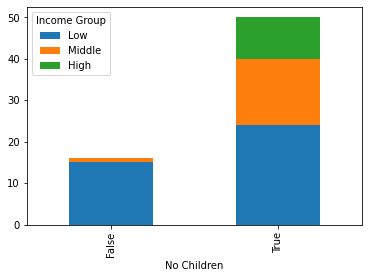

In [109]:
cross_table.plot(kind="bar",
                 stacked=True)